In [6]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Implementing Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Performing action on the text input
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# importing the dataset
dataset = pd.read_csv('G:\\Datasets\\spam.csv', encoding = 'latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# Removing useless columns,
dataset = dataset.iloc[:,:2]

In [9]:

dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
dataset.shape

(5572, 2)

In [11]:
# Dividing the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(dataset.v2, dataset.v1, test_size = 0.3, random_state = 10)

In [12]:
X_train.shape

(3900,)

In [13]:
y_train.head()

2290    ham
4087    ham
2136    ham
4667    ham
4587    ham
Name: v1, dtype: object

In [14]:
vectorizer = TfidfVectorizer()

In [15]:
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [16]:
features_names = vectorizer.get_feature_names()

In [17]:
len(features_names)

7230

In [18]:
X_test_transformed
#feature_names

<1672x7230 sparse matrix of type '<class 'numpy.float64'>'
	with 20543 stored elements in Compressed Sparse Row format>

In [19]:
selector = SelectPercentile(percentile = 10)
selector.fit(X_train_transformed, y_train)

SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x000002A84C1F06A8>)

In [20]:
X_train_transformed = selector.transform(X_train_transformed)
X_test_transformed = selector.transform(X_test_transformed)

In [21]:
X_test_transformed

<1672x723 sparse matrix of type '<class 'numpy.float64'>'
	with 7568 stored elements in Compressed Sparse Row format>

In [22]:
#X_train_transformed.toarray()
X_test_transformed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
# Applying Naive Bayes theorem - multinomial NB
model_mulnb = MultinomialNB()
model_mulnb.fit(X_train_transformed, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
y_predict = model_mulnb.predict(X_test_transformed)

In [25]:
accuracy_score(y_test, y_predict)

0.9407894736842105

In [29]:
#Model Evaluation 
print(confusion_matrix(y_test,y_predict))

[[1446    0]
 [  99  127]]


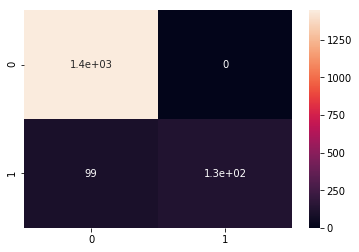

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)